In [ ]:
import os
import time
import torch
from torch import nn
from torch.utils.data import DataLoader, Subset
from torchvision import datasets, transforms
import timm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import pandas as pd
import torch.nn.functional as F
from PIL import Image
import cv2
import random
from sklearn.model_selection import train_test_split
import torch.nn.utils.prune as prune
import json
import zipfile
from google.colab import drive
import gc

drive.mount('/content/drive')

with zipfile.ZipFile("/content/drive/MyDrive/Yeni WinRAR ZIP arşivi2.zip", 'r') as zip_ref:
    zip_ref.extractall("/content")

Mounted at /content/drive


In [ ]:
#[np.int64(13), np.int64(29), np.int64(48), np.int64(55), np.int64(57), np.int64(63), np.int64(65), np.int64(77), np.int64(80), np.int64(85), np.int64(112), np.int64(124), np.int64(135), np.int64(136), np.int64(151), np.int64(157), np.int64(166), np.int64(175), np.int64(182), np.int64(186), np.int64(236), np.int64(248), np.int64(253), np.int64(258), np.int64(285), np.int64(286), np.int64(290), np.int64(330), np.int64(354), np.int64(364), np.int64(382), np.int64(389), np.int64(394), np.int64(396), np.int64(398), np.int64(417), np.int64(451), np.int64(463), np.int64(469), np.int64(471), np.int64(475), np.int64(481), np.int64(510)]
#[np.int64(7), np.int64(19), np.int64(20), np.int64(22), np.int64(36), np.int64(39), np.int64(44), np.int64(80), np.int64(108), np.int64(114), np.int64(115), np.int64(123), np.int64(131), np.int64(136), np.int64(150), np.int64(155), np.int64(160), np.int64(168), np.int64(173), np.int64(181), np.int64(202), np.int64(229), np.int64(231), np.int64(232), np.int64(234), np.int64(241), np.int64(245), np.int64(250), np.int64(265), np.int64(273), np.int64(274), np.int64(283), np.int64(295), np.int64(297), np.int64(312), np.int64(323), np.int64(325), np.int64(345), np.int64(363), np.int64(369), np.int64(373), np.int64(400), np.int64(411), np.int64(419), np.int64(432), np.int64(462), np.int64(509)]
#[np.int64(26), np.int64(46), np.int64(81), np.int64(128), np.int64(132), np.int64(178), np.int64(200), np.int64(234), np.int64(247), np.int64(320), np.int64(374), np.int64(397), np.int64(405), np.int64(408), np.int64(423), np.int64(527), np.int64(530), np.int64(546), np.int64(552), np.int64(561), np.int64(574), np.int64(576), np.int64(618), np.int64(660), np.int64(666), np.int64(710), np.int64(736), np.int64(801), np.int64(809), np.int64(937), np.int64(1001), np.int64(1017), np.int64(1034), np.int64(1046), np.int64(1178), np.int64(1185), np.int64(1201), np.int64(1320), np.int64(1389), np.int64(1422), np.int64(1521), np.int64(1585), np.int64(1678), np.int64(1683), np.int64(1709), np.int64(1963), np.int64(2012)]

important_channels_combined = []

Epoch [1/10]  Train Loss: 0.5170  Val Loss: 0.2074  Time: 24.94s
Epoch [2/10]  Train Loss: 0.1848  Val Loss: 0.1251  Time: 25.15s
Epoch [3/10]  Train Loss: 0.1281  Val Loss: 0.0994  Time: 24.96s
Epoch [4/10]  Train Loss: 0.1100  Val Loss: 0.0787  Time: 24.92s
Epoch [5/10]  Train Loss: 0.0915  Val Loss: 0.0680  Time: 25.00s
Epoch [6/10]  Train Loss: 0.0768  Val Loss: 0.0693  Time: 25.00s
Epoch [7/10]  Train Loss: 0.0724  Val Loss: 0.0607  Time: 24.97s
Epoch [8/10]  Train Loss: 0.0687  Val Loss: 0.0799  Time: 24.97s
Epoch [9/10]  Train Loss: 0.0609  Val Loss: 0.1061  Time: 25.11s
Epoch [10/10]  Train Loss: 0.0547  Val Loss: 0.0586  Time: 25.08s


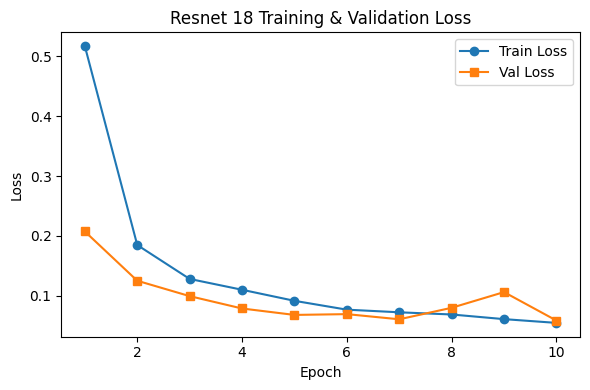


📊 Sınıflandırma Raporu (Tablo Formatında):


,precision,recall,f1-score,support
Tomato___Bacterial_spot,0.9808,0.9668,0.9737,211.0
Tomato___Early_blight,0.9574,0.9091,0.9326,99.0
Tomato___Late_blight,0.9639,0.9894,0.9765,189.0
Tomato___Leaf_Mold,0.9612,1.0000,0.9802,99.0
Tomato___Septoria_leaf_spot,0.9886,0.9943,0.9915,175.0
Tomato___Spider_mites Two-spotted_spider_mite,0.9699,0.9699,0.9699,166.0
Tomato___Target_Spot,0.9926,0.9640,0.9781,139.0
Tomato___Tomato_Yellow_Leaf_Curl_Virus,0.9944,1.0000,0.9972,531.0
Tomato___Tomato_mosaic_virus,0.9798,0.9798,0.9798,99.0
Tomato___healthy,0.9936,0.9873,0.9904,157.0



✅ Genel Accuracy: 0.9823
Epoch [1/10]  Train Loss: 0.3653  Val Loss: 0.1365  Time: 37.44s
Epoch [2/10]  Train Loss: 0.1301  Val Loss: 0.1683  Time: 37.43s
Epoch [3/10]  Train Loss: 0.1064  Val Loss: 0.0793  Time: 37.42s
Epoch [4/10]  Train Loss: 0.0917  Val Loss: 0.1075  Time: 37.45s
Epoch [5/10]  Train Loss: 0.0766  Val Loss: 0.0628  Time: 37.45s
Epoch [6/10]  Train Loss: 0.0756  Val Loss: 0.0613  Time: 37.53s
Epoch [7/10]  Train Loss: 0.0641  Val Loss: 0.0614  Time: 37.49s
Epoch [8/10]  Train Loss: 0.0623  Val Loss: 0.0655  Time: 37.43s
Epoch [9/10]  Train Loss: 0.0608  Val Loss: 0.0726  Time: 37.43s
Epoch [10/10]  Train Loss: 0.0497  Val Loss: 0.0551  Time: 37.33s


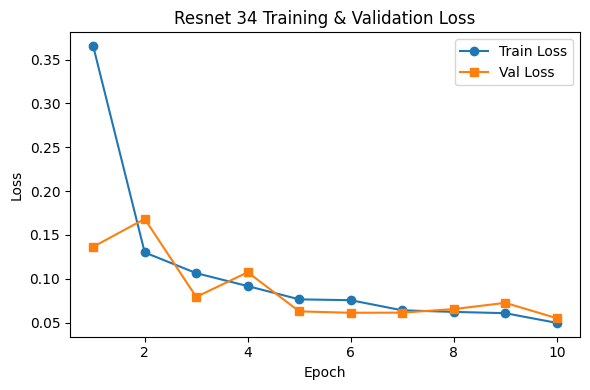


📊 Sınıflandırma Raporu (Tablo Formatında):


,precision,recall,f1-score,support
Tomato___Bacterial_spot,0.9905,0.9858,0.9881,211.0
Tomato___Early_blight,0.9588,0.9394,0.9490,99.0
Tomato___Late_blight,0.9688,0.9841,0.9764,189.0
Tomato___Leaf_Mold,1.0000,0.9798,0.9898,99.0
Tomato___Septoria_leaf_spot,0.9942,0.9714,0.9827,175.0
Tomato___Spider_mites Two-spotted_spider_mite,0.9588,0.9819,0.9702,166.0
Tomato___Target_Spot,0.9650,0.9928,0.9787,139.0
Tomato___Tomato_Yellow_Leaf_Curl_Virus,0.9962,0.9868,0.9915,531.0
Tomato___Tomato_mosaic_virus,0.9802,1.0000,0.9900,99.0
Tomato___healthy,0.9873,0.9936,0.9905,157.0



✅ Genel Accuracy: 0.9834
Epoch [1/10]  Train Loss: 0.2599  Val Loss: 0.0781  Time: 75.22s
Epoch [2/10]  Train Loss: 0.0948  Val Loss: 0.0712  Time: 75.28s
Epoch [3/10]  Train Loss: 0.0755  Val Loss: 0.0669  Time: 75.29s
Epoch [4/10]  Train Loss: 0.0640  Val Loss: 0.0525  Time: 75.31s
Epoch [5/10]  Train Loss: 0.0519  Val Loss: 0.0646  Time: 75.31s
Epoch [6/10]  Train Loss: 0.0422  Val Loss: 0.1002  Time: 75.27s
Epoch [7/10]  Train Loss: 0.0441  Val Loss: 0.0478  Time: 75.30s
Epoch [8/10]  Train Loss: 0.0320  Val Loss: 0.0438  Time: 75.28s
Epoch [9/10]  Train Loss: 0.0315  Val Loss: 0.1006  Time: 75.30s
Epoch [10/10]  Train Loss: 0.0379  Val Loss: 0.0847  Time: 75.30s


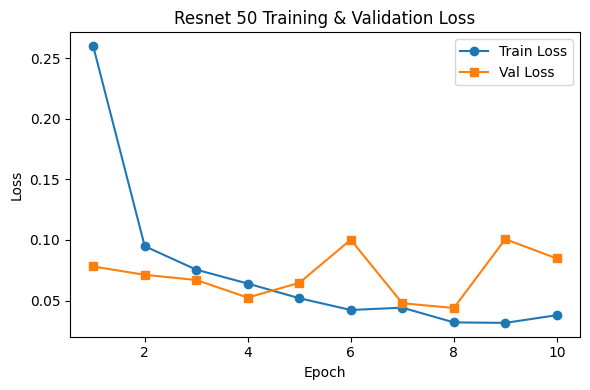


📊 Sınıflandırma Raporu (Tablo Formatında):


,precision,recall,f1-score,support
Tomato___Bacterial_spot,0.9953,0.9953,0.9953,211.0
Tomato___Early_blight,1.0000,0.9495,0.9741,99.0
Tomato___Late_blight,0.9894,0.9841,0.9867,189.0
Tomato___Leaf_Mold,1.0000,0.9798,0.9898,99.0
Tomato___Septoria_leaf_spot,1.0000,0.9829,0.9914,175.0
Tomato___Spider_mites Two-spotted_spider_mite,0.9855,0.8193,0.8947,166.0
Tomato___Target_Spot,0.9714,0.9784,0.9749,139.0
Tomato___Tomato_Yellow_Leaf_Curl_Virus,0.9415,1.0000,0.9699,531.0
Tomato___Tomato_mosaic_virus,0.9800,0.9899,0.9849,99.0
Tomato___healthy,0.9752,1.0000,0.9874,157.0



✅ Genel Accuracy: 0.9743
📊 Evaluating ResNet18...
📊 Evaluating ResNet34...
📊 Evaluating ResNet50...

📈 Karşılaştırmalı Sınıflandırma Performansı:


,Model,Precision,Recall,F1-Score,Accuracy
0,ResNet18,0.9823,0.9823,0.9822,0.9823
1,ResNet34,0.9835,0.9834,0.9834,0.9834
2,ResNet50,0.9752,0.9743,0.9737,0.9743


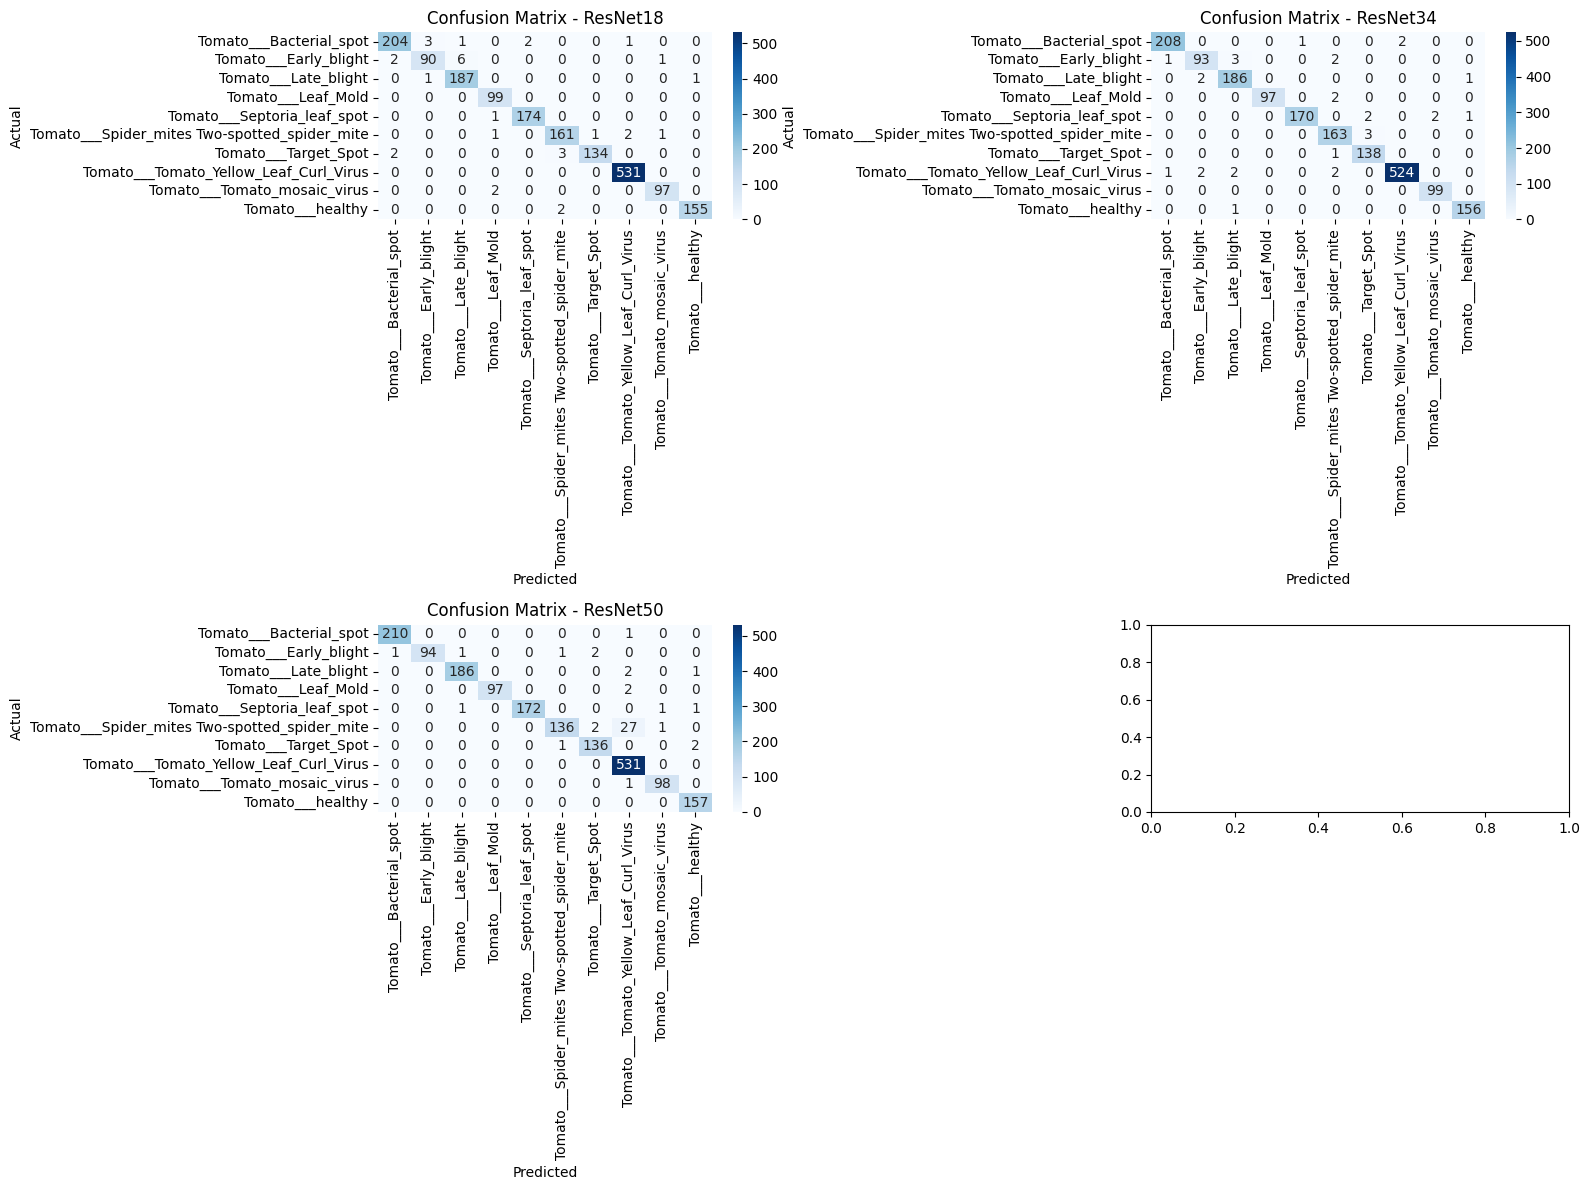

In [ ]:
for i in important_channels_combined:

  # ResNet18 Eğitimi: Pruning ile Seçilen Semantic Kanallarla
  # Ayarlar
  img_size = 224
  num_classes = 10
  augmented_dir = "/content/augmentation"
  validation_dir = "/content/without_augmentation"
  batch_size = 32
  test_ratio = 0.11
  device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

  # Transform
  common_transforms = transforms.Compose([
      transforms.Resize((img_size, img_size)),
      transforms.ToTensor(),
      transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
  ])

  # Dataset yükle
  full_dataset = datasets.ImageFolder(augmented_dir, transform=common_transforms)
  targets = [s[1] for s in full_dataset.samples]
  class_names = full_dataset.classes

  train_idx, test_idx = train_test_split(
      np.arange(len(full_dataset)),
      test_size=test_ratio,
      stratify=targets,
      random_state=42
  )

  train_dataset = Subset(full_dataset, train_idx)
  test_dataset = Subset(full_dataset, test_idx)
  val_dataset = datasets.ImageFolder(validation_dir, transform=common_transforms)

  train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
  test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4)
  val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4)

  #early stop mekanizması
  class EarlyStopping:
      def __init__(self, patience=5, min_delta=0.001):
          self.patience = patience
          self.min_delta = min_delta
          self.counter = 0
          self.best_loss = None
          self.early_stop = False

      def __call__(self, val_loss):
          if self.best_loss is None:
              self.best_loss = val_loss
          elif self.best_loss - val_loss > self.min_delta:
              self.best_loss = val_loss
              self.counter = 0
          else:
              self.counter += 1
              if self.counter >= self.patience:
                  self.early_stop = True

  # model1i oluştur
  model1 = timm.create_model("resnet18", pretrained=False, num_classes=num_classes)
  state_dict = torch.load("/content/drive/MyDrive/resnet_10_epoch/standart/resnet18.pth", map_location=device)
  state_dict = {k: v for k, v in state_dict.items() if not k.startswith("fc.")}
  model1.load_state_dict(state_dict, strict=False)
  model1.to(device)

  # 🔧 Pruning uygulamak için: semantic kanal dışındakileri sıfırla
  selected_channels = i  # daha önce bulduğum 49 semantic kanal
  conv_layer = model1.layer4[-1].conv2  # resnet18'de conv3 yok, conv2 son katman

  # Kanal dışı olanları %100 prune et
  total_channels = conv_layer.out_channels
  mask = torch.zeros(total_channels, device=device)
  for ch in selected_channels:
      if ch < total_channels:
          mask[ch] = 1.0
  prune.CustomFromMask.apply(conv_layer, "weight", mask[:, None, None, None].expand_as(conv_layer.weight))

  # Kayıp ve optimizer
  criterion = nn.CrossEntropyLoss()
  optimizer = torch.optim.Adam(model1.parameters(), lr=1e-4)

  # Eğitim
  epochs = 10
  train_losses = []
  val_losses   = []

  for epoch in range(1, epochs+1):
      # -- Train --
      model1.train()
      running_train_loss = 0.0
      t0 = time.time()

      for images, labels in train_loader:
          images, labels = images.to(device), labels.to(device)
          optimizer.zero_grad()
          outputs = model1(images)
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()
          running_train_loss += loss.item()
      avg_train_loss = running_train_loss / len(train_loader)

      # -- Validation --
      model1.eval()
      running_val_loss = 0.0
      with torch.no_grad():
          for images, labels in test_loader:
              images, labels = images.to(device), labels.to(device)
              outputs = model1(images)
              loss = criterion(outputs, labels)
              running_val_loss += loss.item()
      avg_val_loss = running_val_loss / len(test_loader)

      elapsed = time.time() - t0
      print(f"Epoch [{epoch}/{epochs}]"
            f"  Train Loss: {avg_train_loss:.4f}"
            f"  Val Loss: {avg_val_loss:.4f}"
            f"  Time: {elapsed:.2f}s")
      train_losses.append(avg_train_loss)
      val_losses.append(avg_val_loss)

  # --- Eğitim bittikten sonra Loss eğrilerini çiz ---
  plt.figure(figsize=(6,4))
  epochs_range = range(1, epochs+1)
  plt.plot(epochs_range, train_losses, marker='o', label='Train Loss')
  plt.plot(epochs_range, val_losses,   marker='s', label='Val Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.title('Resnet 18 Training & Validation Loss')
  plt.legend()
  plt.tight_layout()
  plt.show()

  # Ağırlıkları kaydet
  torch.save(model1.state_dict(), "resnet18_pruned.pth")

  # Değerlendirme
  model1.eval()
  all_preds, all_labels = [], []

  with torch.no_grad():
      for images, labels in test_loader:
          images = images.to(device)
          outputs = model1(images)
          _, preds = torch.max(outputs, 1)
          all_preds.extend(preds.cpu().numpy())
          all_labels.extend(labels.numpy())

  report = classification_report(
      all_labels,
      all_preds,
      target_names=class_names,
      output_dict=True
  )

  report_df = pd.DataFrame(report).transpose()
  report_df = report_df.round(4)

  if 'accuracy' in report_df.index:
      accuracy_row = report_df.loc[['accuracy']]
      report_df = report_df.drop(index='accuracy')

  # Son tabloyu göster
  print("\n📊 Sınıflandırma Raporu (Tablo Formatında):")
  display(report_df)

  print(f"\n✅ Genel Accuracy: {report['accuracy']:.4f}")
  '''
  cm = confusion_matrix(all_labels, all_preds, labels=range(num_classes))
  plt.figure(figsize=(10,8))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
              xticklabels=class_names, yticklabels=class_names)
  plt.xlabel('Tahmin Edilen')
  plt.ylabel('Gerçek')
  plt.title('📉 Resnet 18 Confusion Matrix')
  plt.tight_layout()
  plt.show()
  '''
  # ResNet34 Eğitimi: Pruning ile Seçilen Semantic Kanallarla
  '''
  # Ayarlar
  img_size = 224
  num_classes = 10
  augmented_dir = "/content/augmentation"
  validation_dir = "/content/without_augmentation"
  batch_size = 32
  test_ratio = 0.11
  device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

  # Transform
  common_transforms = transforms.Compose([
      transforms.Resize((img_size, img_size)),
      transforms.ToTensor(),
      transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
  ])

  # Dataset yükle
  full_dataset = datasets.ImageFolder(augmented_dir, transform=common_transforms)
  targets = [s[1] for s in full_dataset.samples]
  class_names = full_dataset.classes

  train_idx, test_idx = train_test_split(
      np.arange(len(full_dataset)),
      test_size=test_ratio,
      stratify=targets,
      random_state=42
  )

  train_dataset = Subset(full_dataset, train_idx)
  test_dataset = Subset(full_dataset, test_idx)
  val_dataset = datasets.ImageFolder(validation_dir, transform=common_transforms)

  train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4, pin_memory=True)
  test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True)
  val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True)
'''

  # model2i oluştur
  model2 = timm.create_model("resnet34", pretrained=False, num_classes=num_classes)
  state_dict = torch.load("/content/drive/MyDrive/resnet_10_epoch/standart/resnet34.pth", map_location=device)
  state_dict = {k: v for k, v in state_dict.items() if not k.startswith("fc.")}
  model2.load_state_dict(state_dict, strict=False)
  model2.to(device)

  # 🔧 Pruning uygulamak için: semantic kanal dışındakileri sıfırla
  selected_channels = i  # daha önce bulduğum semantic kanallar
  conv_layer = model2.layer4[-1].conv2  # resnet34'de conv3 yok, conv2 son katman

  # Kanal dışı olanları %100 prune et
  total_channels = conv_layer.out_channels
  mask = torch.zeros(total_channels, device=device)
  for ch in selected_channels:
      if ch < total_channels:
          mask[ch] = 1.0
  prune.CustomFromMask.apply(conv_layer, "weight", mask[:, None, None, None].expand_as(conv_layer.weight))

  # Kayıp ve optimizer
  criterion = nn.CrossEntropyLoss()
  optimizer = torch.optim.Adam(model2.parameters(), lr=1e-4)

  # Eğitim
  epochs = 10
  train_losses = []
  val_losses   = []

  for epoch in range(1, epochs+1):
      # -- Train --
      model2.train()
      running_train_loss = 0.0
      t0 = time.time()

      for images, labels in train_loader:
          images, labels = images.to(device), labels.to(device)
          optimizer.zero_grad()
          outputs = model2(images)
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()
          running_train_loss += loss.item()
      avg_train_loss = running_train_loss / len(train_loader)

      # -- Validation --
      model2.eval()
      running_val_loss = 0.0
      with torch.no_grad():
          for images, labels in test_loader:
              images, labels = images.to(device), labels.to(device)
              outputs = model2(images)
              loss = criterion(outputs, labels)
              running_val_loss += loss.item()
      avg_val_loss = running_val_loss / len(test_loader)
      elapsed = time.time() - t0
      print(f"Epoch [{epoch}/{epochs}]"
            f"  Train Loss: {avg_train_loss:.4f}"
            f"  Val Loss: {avg_val_loss:.4f}"
            f"  Time: {elapsed:.2f}s")
      train_losses.append(avg_train_loss)
      val_losses.append(avg_val_loss)

  # --- Eğitim bittikten sonra Loss eğrilerini çiz ---
  plt.figure(figsize=(6,4))
  epochs_range = range(1, epochs+1)
  plt.plot(epochs_range, train_losses, marker='o', label='Train Loss')
  plt.plot(epochs_range, val_losses,   marker='s', label='Val Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.title('Resnet 34 Training & Validation Loss')
  plt.legend()
  plt.tight_layout()
  plt.show()

  # Ağırlıkları kaydet
  torch.save(model2.state_dict(), "resnet34_pruned.pth")

  # Değerlendirme
  model2.eval()
  all_preds, all_labels = [], []

  with torch.no_grad():
      for images, labels in test_loader:
          images = images.to(device)
          outputs = model2(images)
          _, preds = torch.max(outputs, 1)
          all_preds.extend(preds.cpu().numpy())
          all_labels.extend(labels.numpy())

  report = classification_report(
      all_labels,
      all_preds,
      target_names=class_names,
      output_dict=True
  )

  report_df = pd.DataFrame(report).transpose()
  report_df = report_df.round(4)

  if 'accuracy' in report_df.index:
      accuracy_row = report_df.loc[['accuracy']]
      report_df = report_df.drop(index='accuracy')

  # Son tabloyu göster
  print("\n📊 Sınıflandırma Raporu (Tablo Formatında):")
  display(report_df)

  print(f"\n✅ Genel Accuracy: {report['accuracy']:.4f}")
  '''
  cm = confusion_matrix(all_labels, all_preds, labels=range(num_classes))
  plt.figure(figsize=(10,8))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
              xticklabels=class_names, yticklabels=class_names)
  plt.xlabel('Tahmin Edilen')
  plt.ylabel('Gerçek')
  plt.title('📉 Resnet 34 pruned Confusion Matrix')
  plt.tight_layout()
  plt.show()
  '''

  # ResNet50 Eğitimi: Pruning ile Seçilen Semantic Kanallarla
  '''
  # Ayarlar
  img_size = 224
  num_classes = 10
  augmented_dir = "/content/augmentation"
  validation_dir = "/content/without_augmentation"
  batch_size = 32
  test_ratio = 0.11
  device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

  # Transform
  common_transforms = transforms.Compose([
      transforms.Resize((img_size, img_size)),
      transforms.ToTensor(),
      transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
  ])

  # Dataset yükle
  full_dataset = datasets.ImageFolder(augmented_dir, transform=common_transforms)
  targets = [s[1] for s in full_dataset.samples]
  class_names = full_dataset.classes

  train_idx, test_idx = train_test_split(
      np.arange(len(full_dataset)),
      test_size=test_ratio,
      stratify=targets,
      random_state=42
  )

  train_dataset = Subset(full_dataset, train_idx)
  test_dataset = Subset(full_dataset, test_idx)
  val_dataset = datasets.ImageFolder(validation_dir, transform=common_transforms)

  train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4, pin_memory=True)
  test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True)
  val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True)
  '''

  # model3ü oluştur
  model3 = timm.create_model("resnet50", pretrained=False, num_classes=num_classes)
  state_dict = torch.load("/content/drive/MyDrive/resnet_10_epoch/standart/resnet50.pth", map_location=device)
  state_dict = {k: v for k, v in state_dict.items() if not k.startswith("fc.")}
  model3.load_state_dict(state_dict, strict=False)
  model3.to(device)

  # 🔧 Pruning uygulamak için: semantic kanal dışındakileri sıfırla
  selected_channels = i  # daha önce bulduğum 49 semantic kanal
  conv_layer = model3.layer4[-1].conv3

  # Kanal dışı olanları %100 prune et
  total_channels = conv_layer.out_channels
  mask = torch.zeros(total_channels, device=device)
  for ch in selected_channels:
      if ch < total_channels:
          mask[ch] = 1.0
  prune.CustomFromMask.apply(conv_layer, "weight", mask[:, None, None, None].expand_as(conv_layer.weight))

  # Kayıp ve optimizer
  criterion = nn.CrossEntropyLoss()
  optimizer = torch.optim.Adam(model3.parameters(), lr=1e-4)

  # Eğitim
  #epochs = 10
  train_losses = []
  val_losses   = []

  for epoch in range(1, epochs+1):
      # -- Train --
      model3.train()
      running_train_loss = 0.0
      t0 = time.time()

      for images, labels in train_loader:
          images, labels = images.to(device), labels.to(device)
          optimizer.zero_grad()
          outputs = model3(images)
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()
          running_train_loss += loss.item()
      avg_train_loss = running_train_loss / len(train_loader)

      # -- Validation --
      model3.eval()
      running_val_loss = 0.0
      with torch.no_grad():
          for images, labels in test_loader:
              images, labels = images.to(device), labels.to(device)
              outputs = model3(images)
              loss = criterion(outputs, labels)
              running_val_loss += loss.item()
      avg_val_loss = running_val_loss / len(test_loader)
      elapsed = time.time() - t0
      print(f"Epoch [{epoch}/{epochs}]"
            f"  Train Loss: {avg_train_loss:.4f}"
            f"  Val Loss: {avg_val_loss:.4f}"
            f"  Time: {elapsed:.2f}s")
      train_losses.append(avg_train_loss)
      val_losses.append(avg_val_loss)

  # --- Eğitim bittikten sonra Loss eğrilerini çiz ---
  plt.figure(figsize=(6,4))
  epochs_range = range(1, epochs+1)
  plt.plot(epochs_range, train_losses, marker='o', label='Train Loss')
  plt.plot(epochs_range, val_losses,   marker='s', label='Val Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.title('Resnet 50 Training & Validation Loss')
  plt.legend()
  plt.tight_layout()
  plt.show()

  # Ağırlıkları kaydet
  torch.save(model3.state_dict(), "resnet50_pruned.pth")

  # Değerlendirme
  model3.eval()
  all_preds, all_labels = [], []

  with torch.no_grad():
      for images, labels in test_loader:
          images = images.to(device)
          outputs = model3(images)
          _, preds = torch.max(outputs, 1)
          all_preds.extend(preds.cpu().numpy())
          all_labels.extend(labels.numpy())

  report = classification_report(
      all_labels,
      all_preds,
      target_names=class_names,
      output_dict=True
  )

  report_df = pd.DataFrame(report).transpose()
  report_df = report_df.round(4)

  if 'accuracy' in report_df.index:
      accuracy_row = report_df.loc[['accuracy']]
      report_df = report_df.drop(index='accuracy')

  # Son tabloyu göster
  print("\n📊 Sınıflandırma Raporu (Tablo Formatında):")
  display(report_df)

  print(f"\n✅ Genel Accuracy: {report['accuracy']:.4f}")
  '''
  cm = confusion_matrix(all_labels, all_preds, labels=range(num_classes))
  plt.figure(figsize=(10,8))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
              xticklabels=class_names, yticklabels=class_names)
  plt.xlabel('Tahmin Edilen')
  plt.ylabel('Gerçek')
  plt.title('📉 Resnet 50 Confusion Matrix')
  plt.tight_layout()
  plt.show()
  '''

# evaluate kısmı, tüm modeller tek tek inceleniyor
  def evaluate_model(model, dataloader, class_names, device):
      model.eval()
      all_preds, all_labels = [], []

      with torch.no_grad():
          for images, labels in dataloader:
              images = images.to(device)
              outputs = model(images)
              _, preds = torch.max(outputs, 1)
              all_preds.extend(preds.cpu().numpy())
              all_labels.extend(labels.numpy())
      report = classification_report(
          all_labels, all_preds,
          target_names=class_names,
          output_dict=True
      )

      cm = confusion_matrix(all_labels, all_preds, labels=range(len(class_names)))
      return report, cm

      # Değerlendirmeyi yapacağımız modeller
  models = {
      "ResNet18": model1,
      "ResNet34": model2,
      "ResNet50": model3
  }

  reports = {}
  conf_matrices = {}

  for name, model in models.items():
      print(f"📊 Evaluating {name}...")
      report, cm = evaluate_model(model, test_loader, class_names, device)
      reports[name] = report
      conf_matrices[name] = cm

      # Her model için weighted avg (veya macro avg) precision, recall, f1-score değerlerini toplayalım
  summary_data = []

  for name, report in reports.items():
      row = {
          "Model": name,
          "Precision": report["weighted avg"]["precision"],
          "Recall": report["weighted avg"]["recall"],
          "F1-Score": report["weighted avg"]["f1-score"],
          "Accuracy": report["accuracy"]
      }
      summary_data.append(row)
  summary_df = pd.DataFrame(summary_data)
  summary_df = summary_df.round(4)
  print("\n📈 Karşılaştırmalı Sınıflandırma Performansı:")
  display(summary_df)

  fig, axes = plt.subplots(2, 2, figsize=(16, 12))
  axes = axes.flatten()

  for idx, (name, cm) in enumerate(conf_matrices.items()):
      ax = axes[idx]
      sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                  xticklabels=class_names,
                  yticklabels=class_names,
                  ax=ax)
      ax.set_title(f"Confusion Matrix - {name}")
      ax.set_xlabel('Predicted')
      ax.set_ylabel('Actual')

  plt.tight_layout()
  plt.show()